In [2]:
#Install all the needed libraries
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install Pillow
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install tensorflow

In [3]:
#import libraries and data
import keras
from keras.datasets import mnist
from keras import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D, Flatten
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_epochs = 5

Using TensorFlow backend.


In [0]:
#Functions to resize, add rotation, and add noise
def x_resize(x, newdim = 32):
  new_x = np.zeros((x.shape[0], newdim, newdim, 1))
  for i in range(x.shape[0]):
    img = Image.fromarray(x[i,:,:]) 
    new_x[i,:,:,0] = img.resize((newdim, newdim), PIL.Image.ANTIALIAS)
  return new_x

def rotate_img(x, theta):
  x_rot = np.zeros((x.shape[0], x.shape[1], x.shape[2], 1))
  for i in range(x.shape[0]):
    img = Image.fromarray(x[i,:,:,0])
    x_rot[i,:,:,0] = img.rotate(theta)
  return x_rot

def noisy_gauss_img(x, scale, var):
  (row,col,ch,dim) = x.shape
  mean = 0
  sigma = np.sqrt(var)*scale
  gauss = np.random.normal(mean,sigma,(row,col,ch,dim))
  gauss = gauss.reshape(row,col,ch,dim)
  noisy = x + gauss
  return noisy

In [0]:
#Applying resizing function to my training and test sets
new_x_train = x_resize(x_train)
new_x_test = x_resize(x_test)
#Change y values to categorical values
new_y_train = keras.utils.to_categorical(y_train, num_classes= 10)
new_y_test = keras.utils.to_categorical(y_test, num_classes= 10)

#gettng noisy and rotated images
rotate_test = []
thetas = [-40, -30, -20, -10, 0, 10, 20, 30, 40]
for theta in thetas:
  x_rotate = np.zeros(new_x_test.shape)
  x_rotate = rotate_img(new_x_test, theta)
  rotate_test.append(x_rotate)

#Noisy data
gauss = [0.01, 0.1, 1]
noisy_test = []
for var in gauss:
  noisy_test.append(noisy_gauss_img(new_x_test, 255, var))


In [0]:
#Augmented data
gauss_var = 1
theta_aug = [-25, 0, 25]
aug_x_train = []
aug_y_train = []
for theta in theta_aug:
  aug_train = np.zeros(new_x_train.shape)
  aug_train = rotate_img(new_x_train, theta)
  aug_x_train.append(aug_train)
  aug_y_train.append(new_y_train)

xtrain = np.asarray(aug_x_train)
xtrain = xtrain.reshape(180000, 32, 32, 1)
aug_xtrain = noisy_gauss_img(xtrain, 255, gauss_var)

ytrain = np.asarray(aug_y_train)
aug_ytrain = ytrain.reshape((180000, 10))

In [24]:
#Creating sequential model and fitting it to training data
model = Sequential()
model.add(Conv2D(64, 3, strides = (1, 1), padding = 'same', activation= 'relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides= 2))

model.add(Conv2D(128, 3, strides = (1, 1), padding = 'same', activation= 'relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides= 2))

model.add(Conv2D(256, 3, strides = (1, 1), padding = 'same', activation= 'relu'))
model.add(Conv2D(256, 3, strides = (1, 1), padding = 'same', activation= 'relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides= 2))

model.add(Conv2D(512, 3, strides = (1, 1), padding = 'same', activation= 'relu'))
model.add(Conv2D(512, 3, strides = (1, 1), padding = 'same', activation= 'relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides= 2))

model.add(Conv2D(512, 3, strides = (1, 1), padding = 'same', activation= 'relu'))
model.add(Conv2D(512, 3, strides = (1, 1), padding = 'same', activation= 'relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides= 2))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(10, activation= 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='SGD',  metrics=['accuracy'])
train_output = model.fit(new_x_train, new_y_train, epochs = num_epochs, validation_data = (new_x_test, new_y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 98s 2ms/step - loss: 0.2016 - acc: 0.9348 - val_loss: 0.0425 - val_acc: 0.9859
Epoch 2/5
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0439 - acc: 0.9861 - val_loss: 0.0304 - val_acc: 0.9903
Epoch 3/5
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0286 - acc: 0.9910 - val_loss: 0.0349 - val_acc: 0.9893
Epoch 4/5
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0176 - acc: 0.9944 - val_loss: 0.0195 - val_acc: 0.9936
Epoch 5/5
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0124 - acc: 0.9961 - val_loss: 0.0236 - val_acc: 0.9918


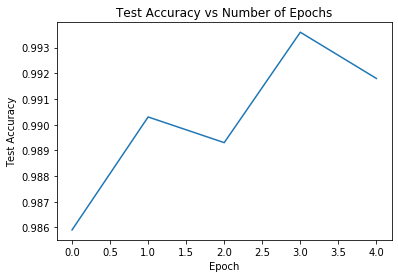

In [25]:
plt.plot(train_output.history['val_acc'])
plt.title('Test Accuracy vs Number of Epochs')
plt.ylabel('Test Accuracy')
plt.xlabel('Epoch')
plt.show()

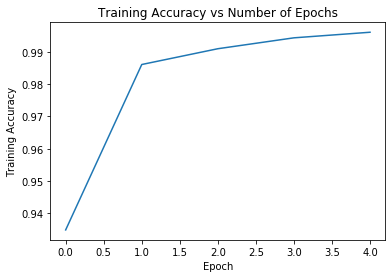

In [26]:
plt.plot(train_output.history['acc'])
plt.title('Training Accuracy vs Number of Epochs')
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.show()

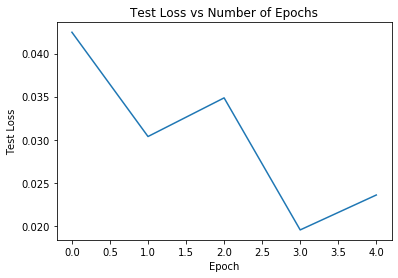

In [27]:
plt.plot(train_output.history['val_loss'])
plt.title('Test Loss vs Number of Epochs')
plt.ylabel('Test Loss')
plt.xlabel('Epoch')
plt.show()

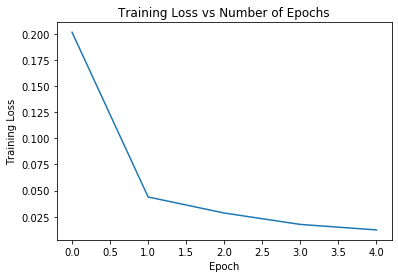

In [28]:
plt.plot(train_output.history['loss'])
plt.title('Training Loss vs Number of Epochs')
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.show()

In [29]:
rotate_output = []
for img in rotate_test:
  rotate_output.append(model.evaluate(img, new_y_test)[1])
  

10000/10000 [==============================] - 4s 369us/step


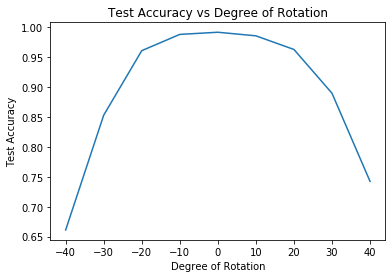

In [30]:
plt.plot(thetas, rotate_output)
plt.title('Test Accuracy vs Degree of Rotation')
plt.ylabel('Test Accuracy')
plt.xlabel('Degree of Rotation')
plt.show()

In [31]:
noisy_output = []
for img in noisy_test:
  noisy_output.append(model.evaluate(img, new_y_test)[1])

10000/10000 [==============================] - 4s 370us/step


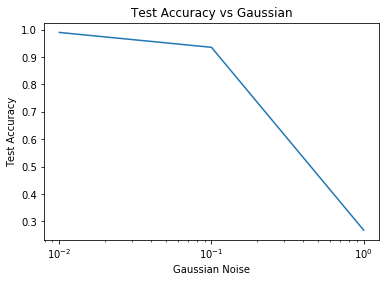

In [32]:
plt.plot(gauss, noisy_output)
plt.title('Test Accuracy vs Gaussian')
plt.ylabel('Test Accuracy')
plt.xlabel('Gaussian Noise')
plt.xscale('log')
plt.show()

In [40]:
model2 = Sequential()
model2.add(Conv2D(64, 3, strides = (1, 1), padding = 'same', activation= 'relu'))
model2.add(MaxPool2D(pool_size=(2, 2), strides= 2))

model2.add(Conv2D(128, 3, strides = (1, 1), padding = 'same', activation= 'relu'))
model2.add(MaxPool2D(pool_size=(2, 2), strides= 2))

model2.add(Conv2D(256, 3, strides = (1, 1), padding = 'same', activation= 'relu'))
model2.add(Conv2D(256, 3, strides = (1, 1), padding = 'same', activation= 'relu'))
model2.add(MaxPool2D(pool_size=(2, 2), strides= 2))

model2.add(Conv2D(512, 3, strides = (1, 1), padding = 'same', activation= 'relu'))
model2.add(Conv2D(512, 3, strides = (1, 1), padding = 'same', activation= 'relu'))
model2.add(MaxPool2D(pool_size=(2, 2), strides= 2))

model2.add(Conv2D(512, 3, strides = (1, 1), padding = 'same', activation= 'relu'))
model2.add(Conv2D(512, 3, strides = (1, 1), padding = 'same', activation= 'relu'))
model2.add(MaxPool2D(pool_size=(2, 2), strides= 2))

model2.add(Flatten())
model2.add(Dense(4096, activation='relu'))
model2.add(Dense(4096, activation='relu'))
model2.add(Dense(10, activation= 'softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='SGD',  metrics=['accuracy'])
train_output = model2.fit(aug_xtrain, aug_ytrain, epochs = num_epochs)

Epoch 1/5
180000/180000 [==============================] - 290s 2ms/step - loss: 0.7543 - acc: 0.7415
Epoch 2/5
180000/180000 [==============================] - 288s 2ms/step - loss: 0.4261 - acc: 0.8588
Epoch 3/5
180000/180000 [==============================] - 288s 2ms/step - loss: 0.3596 - acc: 0.8791
Epoch 4/5
180000/180000 [==============================] - 290s 2ms/step - loss: 0.3115 - acc: 0.8949
Epoch 5/5
180000/180000 [==============================] - 290s 2ms/step - loss: 0.2674 - acc: 0.9083


In [41]:
rotate_output = []
for img in rotate_test:
  rotate_output.append(model2.evaluate(img, new_y_test)[1])

10000/10000 [==============================] - 4s 370us/step


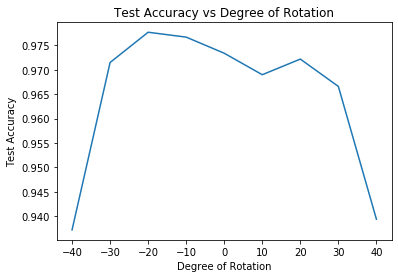

In [42]:
plt.plot(thetas, rotate_output)
plt.title('Test Accuracy vs Degree of Rotation using Augemented Model')
plt.ylabel('Test Accuracy')
plt.xlabel('Degree of Rotation')
plt.show()

In [43]:
noisy_output = []
for img in noisy_test:
  noisy_output.append(model2.evaluate(img, new_y_test)[1])

10000/10000 [==============================] - 4s 369us/step


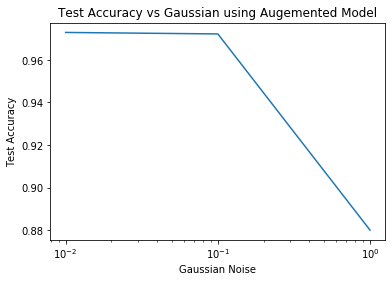

In [44]:
plt.plot(gauss, noisy_output)
plt.title('Test Accuracy vs Gaussian using Augemented Model')
plt.ylabel('Test Accuracy')
plt.xlabel('Gaussian Noise')
plt.xscale('log')
plt.show()